In [13]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import pydicom

import warnings
warnings.filterwarnings('ignore')

In [14]:
train_data = pd.read_csv('../input/osic-pulmonary-fibrosis-progression/train.csv')
test_data = pd.read_csv('../input/osic-pulmonary-fibrosis-progression/test.csv')

train_data.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker



*    **Patient** - a unique Id for each patient (also the name of the patient's DICOM folder)
*    **Weeks** - the relative number of weeks pre/post the baseline CT (may be negative)
*    **FVC** - the recorded lung capacity in ml (Forced vital capacity)
*    **Percent** - a computed field which approximates the patient's FVC as a percent of the typical FVC for a person of similar characteristics
*    **Age** - Age of person
*    **Sex** - Sex of person (Male/Female)
*    **SmokingStatus** - Whether the patient is a smoker/non-smoker/ex-smoker


>  # Explore the data

In [15]:
print(train_data.shape)
print('----------------------------')

#null values in test & train data
print(train_data.isnull().sum())
print('----------------------------')
print(test_data.isnull().sum())
print('----------------------------')

#data type of each column
print(train_data.dtypes)

(1549, 7)
----------------------------
Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
dtype: int64
----------------------------
Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
dtype: int64
----------------------------
Patient           object
Weeks              int64
FVC                int64
Percent          float64
Age                int64
Sex               object
SmokingStatus     object
dtype: object


### No Missing Data
### 1549 rows AND 7 columns

> # **Total  unique patient id's**

In [16]:
#total unique id's of the patients as from shape we know total id's are 1549
train_data['Patient'].nunique()

176

> # Visualizing Training data

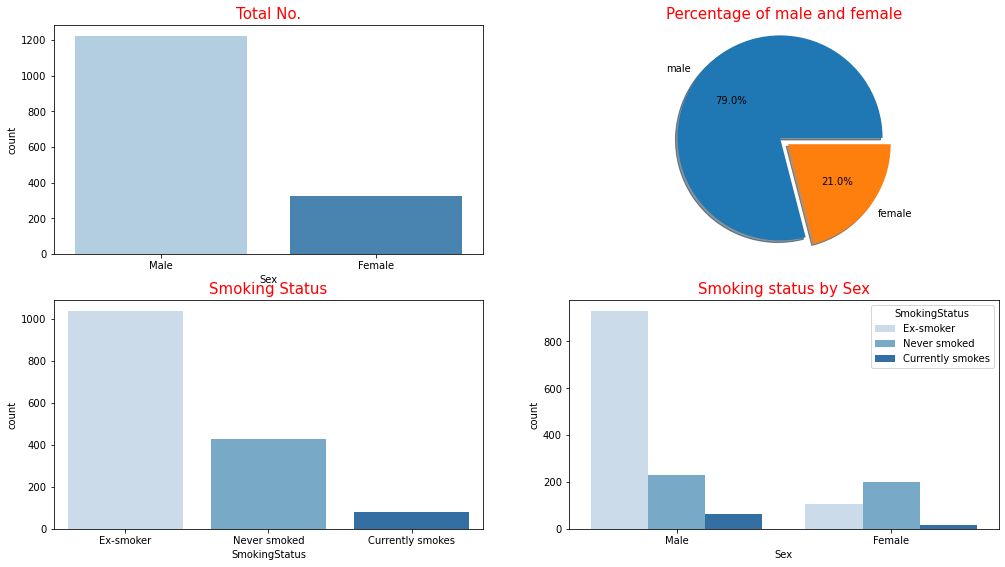

In [17]:
fig, ax = plt.subplots(2,2, figsize=(15,7))
plt.subplots_adjust(bottom=0, right=1, top=1)

ax[0,0].set_title('Total No.', color='red', fontsize = 15)
sns.countplot('Sex', data= train_data, palette='Blues', ax= ax[0,0] )

ax[1,0].set_title('Smoking Status', color='red', fontsize = 15)
sns.countplot('SmokingStatus', data=train_data, palette='Blues', ax=ax[1,0])

ax[1,1].set_title('Smoking status by Sex', color='red', fontsize = 15)
sns.countplot('Sex', data=train_data, hue='SmokingStatus', palette = 'Blues', ax=ax[1,1])

#gender percentage
count = [train_data['Sex'].value_counts().values]
labels = ['male', 'female']
explode = (0.1,0)

ax[0,1].set_title('Percentage of male and female', color='red', fontsize = 15)
ax[0,1].pie(count, labels=labels,
       explode = explode, 
       shadow= True,  
       autopct='%1.1f%%')
ax[0,1].axis('equal') 
plt.show()



> ## No. of images per  unique patient

In [18]:
id_count = pd.DataFrame(train_data['Patient'].value_counts())
id_count['id'] =id_count.index
id_count.columns= ['count','id']

fig = px.bar(id_count, x='id',y ='count',color='count')
fig.update_xaxes(showticklabels=False)
fig.show()

> # Distribution of the data

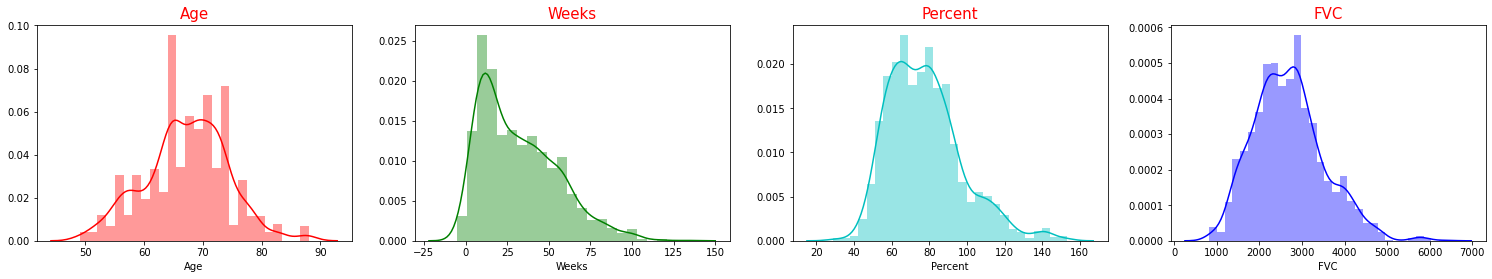

In [19]:
fig, ax = plt.subplots(1,4, figsize =(23,3))
plt.subplots_adjust(bottom=0, right=1, top=1)

ax[0].set_title('Age', color='red', fontsize = 15)
sns.distplot(train_data['Age'],  color="r", ax=ax[0])

ax[1].set_title('Weeks', color='red', fontsize = 15)
sns.distplot(train_data['Weeks'],  color="g", ax=ax[1])

ax[2].set_title('Percent', color='red', fontsize = 15)
sns.distplot(train_data['Percent'],  color="c", ax=ax[2])

ax[3].set_title('FVC', color='red', fontsize = 15)
sns.distplot(train_data['FVC'],  color="b", ax=ax[3])
plt.show()

*  Age is Normal distribution.
*  Weeks is right skewed  distribution.
*  Percent is also right skewed distrivution.
*  FVC is also  little right skewed

> # Age & Smoking Status

In [20]:
fig = px.histogram(train_data, x='Age', color='SmokingStatus', marginal="violin",color_discrete_map={'Ex-smoker':'#393E46','Never smoked':'#7c7c79','Currently smokes':'#04d6cb'})
fig.update_traces(marker_line_color='cyan',marker_line_width=1.5, opacity=0.85)
fig.show()

> # Age & Gender

In [21]:
fig = px.histogram(train_data, x='Age', color='Sex',marginal="violin", color_discrete_map={'Male':'#393E46','Female':'#04d6cb'})
fig.update_traces(marker_line_color='black',marker_line_width=1.5, opacity=0.85)
fig.show()

1. > # EXPLORING FVC
>      Normal values in healthy males aged 20-60 range from 3500 to 4500 ml, and normal values for females aged 20-60 range from 2500 to 3500 ml.

In [22]:
fig = px.histogram(train_data, x='FVC', color='Sex', title='FVC by Gender', marginal="violin", color_discrete_map={'Male':'#393E46','Female':'#04d6cb'})
fig.update_traces(marker_line_color='black',marker_line_width=1.5, opacity=0.85)
fig.show()

In [23]:
fig = px.histogram(train_data, x='FVC', color='SmokingStatus', marginal="violin",color_discrete_map={'Ex-smoker':'#393E46','Never smoked':'#7c7c79','Currently smokes':'#04d6cb'})
#fig.update_traces(marker_line_color='black',marker_line_width=1.5, opacity=0.85)
fig.update_layout(title='FVC by Smoking Status')
fig.show()

> ## Visualizing images

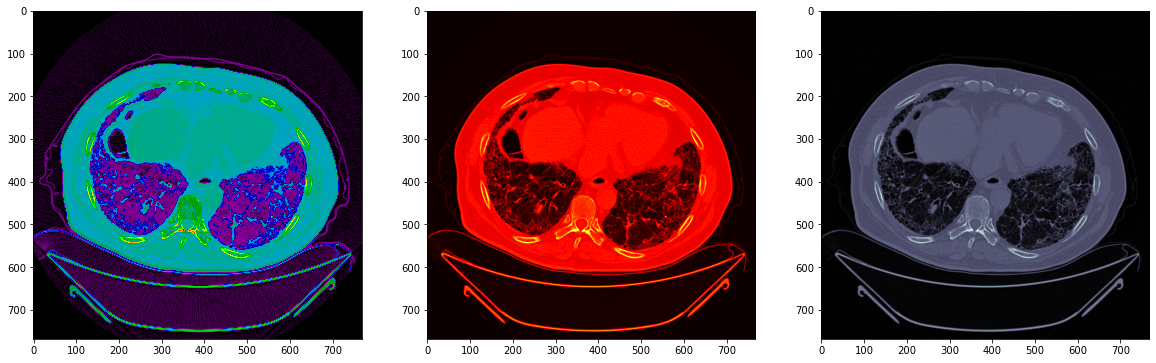

In [24]:
img_path = "../input/osic-pulmonary-fibrosis-progression/train/ID00027637202179689871102/125.dcm"
img = pydicom.dcmread(img_path)
fig, ax = plt.subplots(1,3, figsize=(20,10))
ax[0].imshow(img.pixel_array,cmap='nipy_spectral')
ax[1].imshow(img.pixel_array,cmap='hot')
ax[2].imshow(img.pixel_array,cmap=plt.cm.bone)

plt.show()